In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [ ]:
len(df_claim)

In [2]:
df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [4]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [5]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


# preprocessing

In [6]:
def cleantext(df_claim_uspto): 
    
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    #remove numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    return df_claim_uspto

df_claim_uspto = cleantext(df_claim_uspto)
df_claim_uspto.head()

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\dtypes\inference.py:181: FutureWarning: Possible nested set at position 1
  re.compile(obj)


,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...


In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...


In [9]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'Lemmatized-Claim' column
df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)
df_claim_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."


# divide the dataset

In [11]:
#Divide the dataset into different size
df_claim_20K=df_claim_uspto[:20000]
df_claim_20K.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."


In [12]:
New_Sample = df_claim_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
59394,9083591,Communication apparatus and communication method,1. A communication apparatus for communicating...,H04L,a communication apparatus for communicating w...,communication communicating another orthogonal...,communication communicating another orthogonal...,"[communication, communicating, another, orthog..."


In [13]:
new_claim = str(New_Sample["Lemmatized-Claim"].iloc[0])
new_claim

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator modulates input signal using predetermined modulation scheme assigns modulated input signal subcarriers frequency component orthogonal thereby generating subcarrier modulation signal inserter insert transmissionside series signal synthesis way element signal synthesis element transmissionside series alternately positioned thereby generating first signal synthesis generated multiplying subcarrier modulation signal predetermined signal amplitude coefficient transmissionside series generated multiplying series set whose quantity equal number subcarriers autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted predetermined series amplitude coefficient first transformer performs inverse fast fourier transformation first separator separate operation result first transformer first half second half element eq

# NMF on 20k patent

In [14]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_20K['Lemmatized-Claim']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Train the NMF model
num_topics = 50
nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)

# Transform the corpus to get the topic distribution for each document
nmf_output = nmf_model[tfidf_corpus]

# Calculate coherence metrics
cm_cv = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()

cm_npmi = CoherenceModel(model=nmf_model, texts=docs, corpus=tfidf_corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()

cm_umass = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.45129103915852053
c_npmi coherence: 0.0009151738353764994
u_mass coherence: -4.372792189712559


In [15]:
for i in range(num_topics):
    print(f"Topic {i}:")
    topic_words = [id2word[int(word_id)] for word_id, _ in nmf_model.show_topic(i, topn=5)]
    print(topic_words)

Topic 0:
['electrode', 'pattern', 'disposed', 'capacitor', 'insulating_layer']
Topic 1:
['housing', 'unit', 'current', 'light', 'switch']
Topic 2:
['coil', 'lead', 'area', 'display', 'case']
Topic 3:
['signal', 'audio', 'digital', 'frequency', 'receiver']
Topic 4:
['network', 'channel', 'wireless', 'communication', 'wireless_communication']
Topic 5:
['communication', 'stream', 'beam', 'event', 'temperature']
Topic 6:
['member', 'memory', 'structure', 'base', 'surface']
Topic 7:
['image', 'object', 'area', 'camera', 'line']
Topic 8:
['contact', 'location', 'symbol', 'bit', 'vehicle']
Topic 9:
['side', 'support', 'end', 'pair', 'cable']
Topic 10:
['substrate', 'surface', 'layer', 'insulating_layer', 'forming']
Topic 11:
['block', 'line', 'conductive', 'picture', 'motion_vector']
Topic 12:
['unit', 'control', 'application', 'pixel', 'lens']
Topic 13:
['service', 'mobile', 'call', 'type', 'communication']
Topic 14:
['packet', 'buffer', 'network', 'interface', 'magnetic']
Topic 15:
['group'

In [16]:
# Get the most probable topic and its probability for each document
doc_topics = [sorted(nmf_model.get_document_topics(doc), key=lambda x: x[1], reverse=True) for doc in nmf_output]

In [19]:
# Create empty columns for topic number and probability
df_claim_20K['nmf_topics'] = 0
df_claim_20K['nmf_prob'] = 0.0

# Loop through each document and update the corresponding row in the dataframe
for i, doc in enumerate(doc_topics):
    if len(doc) > 0:
        topic_num, topic_prob = doc[0]
        df_claim_20K.at[i, 'nmf_topics'] = topic_num
        df_claim_20K.at[i, 'nmf_prob'] = topic_prob

C:\Users\admin\AppData\Local\Temp/ipykernel_22276/3619136393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_20K['nmf_topics'] = 0
C:\Users\admin\AppData\Local\Temp/ipykernel_22276/3619136393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_20K['nmf_prob'] = 0.0


In [21]:
df_claim_20K.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens,nmf_topics,nmf_prob
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,...",29,0.485220
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie...",47,0.277856
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne...",36,0.725323
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces...",39,0.337228
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic...",47,0.634526


In [24]:
df_Claim_20K_topic=df_claim_20K[["ID","Title","Claim","cpc_subclass","Lemmatized-Claim", "nmf_topics", "nmf_prob"]]
df_Claim_20K_topic.head()

,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,nmf_topics,nmf_prob
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",advertising displaying television program vide...,29,0.485220
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",receiving mobile switching network carrier gat...,47,0.277856
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",resistance change memory first interconnect li...,36,0.725323
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",processing first processing second processing ...,39,0.337228
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",computerimplemented transferring electronic de...,47,0.634526


In [25]:
#prediction

In [26]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]
query_tokens = trigram_phrases[bigram_phrases[new_claim.split()]]
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query
query_tfidf = tfidf[query_bow]
query_topic_dist = nmf_model[query_tfidf]

# Get the top 3 topics for the query
top_topics = sorted(query_topic_dist, key=lambda x: x[1], reverse=True)[:3]

# Print the top 3 topics with words and probabilities
for topic_id, topic_prob in top_topics:
    print(f"Topic {topic_id} (probability: {topic_prob:.2f})")

Topic 3 (probability: 0.39)
Topic 18 (probability: 0.22)
Topic 31 (probability: 0.08)


In [27]:
# filter the documents that have a predicted topic (for example here predicted topi for query is 33)

In [28]:
filter_topics_nmf=df_Claim_20K_topic[df_Claim_20K_topic['nmf_topics'] == 3]
filter_topics_nmf = filter_topics_nmf.sort_values('nmf_prob', ascending=False)
filter_topics_nmf = filter_topics_nmf.reset_index().rename(columns={'index': 'new_index'})
filter_topics_nmf

,new_index,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,nmf_topics,nmf_prob
0,1732,8930724,Semiconductor device predictive dynamic therma...,"1. A semiconductor device, comprising: a memor...","G06F,H01L,Y02D",semiconductor memory store lookup table stored...,3,0.148393
1,7060,8943525,"Information processing apparatus, information ...","1. An information processing apparatus, compri...",H04N,processing storage store rarity level piece co...,3,0.134869
2,3358,8935010,Power distribution within high-power networkin...,1. A network device comprising: at least one c...,H04L,network least one chassis hotswappable network...,3,0.132465
3,18114,8970329,Component having a multipactor-inhibiting carb...,"1. A method of manufacturing a high power RF, ...","B82Y,H01J,H01P,Y10T",manufacturing high power rf microwave millimet...,3,0.132246
4,860,8925660,Power generation system and method for assembl...,1. A method for arranging components of a powe...,"F02B,H02K,Y10S,Y10T",arranging component power generation electrica...,3,0.124768
5,18091,8970660,Methods and systems for authentication in secu...,1. A computerized method for authenticating an...,"H04L,H04M,H04N",computerized authenticating end point particip...,3,0.123486
6,17021,8971950,Method and device for transmission power control,1. A method in a base station for adjusting tr...,H04W,base station adjusting transmission power user...,3,0.119822
7,9598,8952566,Chassis slots accepting battery modules and ot...,1. An apparatus comprising: a component interc...,"G06F,H02J,H05K,Y10T",component interconnect board multifunction slo...,3,0.118812
8,7919,8947769,Tunable three level terahertz magnon laser gen...,1. An apparatus for terahertz photon generatio...,"H01L,H01S",terahertz photon generation three level magnon...,3,0.099568
9,10368,8952648,Washing machine with improved braking method,1. A method of braking a washing machine from ...,"D06F,H02P",braking washing machine operational speed zero...,3,0.097290


In [29]:
#calculate the similarity between the query and document in dataset with the Doc2Vec embedding

In [32]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Convert the list of documents to a list of sentences
sentences = [doc.split() for doc in filter_topics_nmf['Lemmatized-Claim'].tolist()]

# Create a list of TaggedDocument objects, where each TaggedDocument represents a single document in the corpus
# The words attribute of each TaggedDocument is set to a list of tokens for the corresponding document
# The tags attribute of each TaggedDocument is set to a list containing a single string, which is the index of the document in the corpus
tagged_data = [TaggedDocument(words=sentences[i], tags=[str(i)]) for i in range(len(sentences))]

# Train a Doc2Vec model on the tagged documents
# The vector_size parameter specifies the dimensionality of the document vectors
# The window parameter specifies the maximum distance between the predicted word and the context words within a sentence
# The min_count parameter specifies the minimum frequency of a word in the corpus to be included in the vocabulary
# The epochs parameter specifies the number of iterations over the corpus during training
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=5, epochs=50)

# Infer the document vector for the new claim
# The split() method converts the string to a list of tokens
# The infer_vector() method calculates the document vector using the trained model
new_Claim_vector = model.infer_vector(new_claim.split())

# Calculate the cosine similarity between the new claim and the documents in the corpus
# The infer_vector() method is called for each document in the corpus to calculate the document vectors
doc_vectors = [model.infer_vector(sentences[i]) for i in range(len(sentences))]
similarity_scores = cosine_similarity([new_Claim_vector], doc_vectors)

In [33]:
# Add a new column to the dataframe to store the similarity scores
filter_topics_nmf['cosin_similarity_Doc2vec'] = similarity_scores[0]
filter_topics_nmf

,new_index,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,nmf_topics,nmf_prob,cosin_similarity_Doc2vec
0,1732,8930724,Semiconductor device predictive dynamic therma...,"1. A semiconductor device, comprising: a memor...","G06F,H01L,Y02D",semiconductor memory store lookup table stored...,3,0.148393,0.995331
1,7060,8943525,"Information processing apparatus, information ...","1. An information processing apparatus, compri...",H04N,processing storage store rarity level piece co...,3,0.134869,0.997239
2,3358,8935010,Power distribution within high-power networkin...,1. A network device comprising: at least one c...,H04L,network least one chassis hotswappable network...,3,0.132465,0.999707
3,18114,8970329,Component having a multipactor-inhibiting carb...,"1. A method of manufacturing a high power RF, ...","B82Y,H01J,H01P,Y10T",manufacturing high power rf microwave millimet...,3,0.132246,0.995267
4,860,8925660,Power generation system and method for assembl...,1. A method for arranging components of a powe...,"F02B,H02K,Y10S,Y10T",arranging component power generation electrica...,3,0.124768,0.926805
5,18091,8970660,Methods and systems for authentication in secu...,1. A computerized method for authenticating an...,"H04L,H04M,H04N",computerized authenticating end point particip...,3,0.123486,0.999634
6,17021,8971950,Method and device for transmission power control,1. A method in a base station for adjusting tr...,H04W,base station adjusting transmission power user...,3,0.119822,0.999813
7,9598,8952566,Chassis slots accepting battery modules and ot...,1. An apparatus comprising: a component interc...,"G06F,H02J,H05K,Y10T",component interconnect board multifunction slo...,3,0.118812,0.997691
8,7919,8947769,Tunable three level terahertz magnon laser gen...,1. An apparatus for terahertz photon generatio...,"H01L,H01S",terahertz photon generation three level magnon...,3,0.099568,0.996336
9,10368,8952648,Washing machine with improved braking method,1. A method of braking a washing machine from ...,"D06F,H02P",braking washing machine operational speed zero...,3,0.097290,0.999778


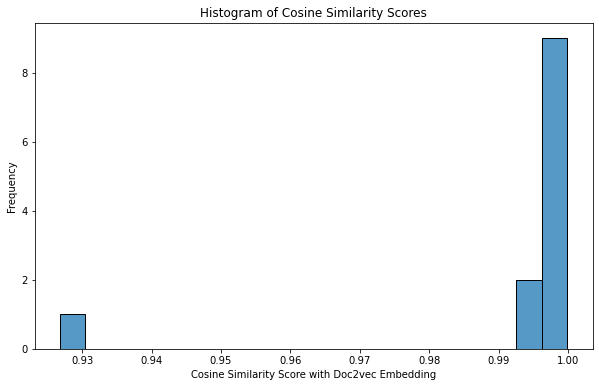

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_nmf['cosin_similarity_Doc2vec']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score with Doc2vec Embedding')
plt.ylabel('Frequency')
plt.show()

In [35]:
#get the most similar doc in dataset to query

In [36]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['Claim']

most_similar_doc

'1. An antenna system comprising: at least one antenna, one antenna downlead enabling processing of analog signals transmitted and received by the antenna, and one X-Y mount, said mount being composed of at least three mechanical elements, the first element being a base, the second element being a so-called lower box, the third element being a so-called upper box, the antenna of the system being fixed to the upper box, wherein components of the antenna downlead are distributed in said first, second and third elements composing the X-Y mount, an OrthoMode Transducer type junction included in the upper box enabling separation of the components of the downlead into two separate paths, a first path called an ascending path comprising components for amplifying and processing signals to be transmitted by the antenna, a second path called a descending path comprising components for processing and amplifying signals received by the antenna, the components associated with these two paths being 

In [37]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['Lemmatized-Claim']

most_similar_doc

'antenna least one antenna one antenna downlead enabling processing analog signal transmitted received antenna one xy mount mount composed least three mechanical element first element base second element socalled lower box third element socalled upper box antenna fixed upper box component antenna downlead distributed first second third element composing xy mount orthomode transducer type junction upper box enabling separation component downlead two separate path first path called ascending path component amplifying processing signal transmitted antenna second path called descending path component processing amplifying signal received antenna component associated two path placed either side first second third element xy mount thus providing balancing'